In [15]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt

In [16]:
def manhattan_distance(point1, point2):
    return sum(abs(x - y) for x, y in zip(point1, point2))

def euclidean_distance(point1, point2):
    sum_squared_distance = sum((x - y) ** 2 for x, y in zip(point1, point2))
    return sum_squared_distance ** 0.5 

def initialize_centroids(data, k):
    centroids = random.sample(data, k)
    return centroids

def assign_to_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    
    for point in data:
        distances = [manhattan_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    
    return clusters

def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
        cluster_center = [sum(point[i] for point in cluster) / len(cluster) for i in range(len(cluster[0]))]
        centroids.append(cluster_center)
    return centroids

def has_converged(old_centroids, new_centroids, tol=1e-4):
    return all(manhattan_distance(old, new) < tol for old, new in zip(old_centroids, new_centroids))

def k_means(data, k):
    centroids = initialize_centroids(data, k)
    converged = False
    
    while not converged:
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        converged = has_converged(centroids, new_centroids)
        centroids = new_centroids
    
    return centroids, clusters


In [17]:
def plot_clusters(centroids, clusters):
    plt.figure(figsize=(8, 6))
    
    for i, cluster in enumerate(clusters):
        x, y = zip(*cluster)
        plt.scatter(x, y, label=f'Cluster {i + 1}')
    
    centroids_x, centroids_y = zip(*centroids)
    plt.scatter(centroids_x, centroids_y, color='black', marker='x', s=100, label='Centroides')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [18]:
def kMeansComplete(Archive, listaCaracteristicas, k): 
    data = pd.read_csv(Archive)
    for columna in listaCaracteristicas:
        data = data[data[columna] != 0]
        
    columnas_seleccionadas = data[listaCaracteristicas]
    data_list = columnas_seleccionadas.values.tolist()
    k=3
    centroids, clusters = k_means(data_list, k)

    for i, centroid in enumerate(centroids):
        print(f"Centroide {i + 1}: {centroid}")
        print(f"Puntos en el cluster {i + 1}: {clusters[i]}")
        
    plot_clusters(centroids, clusters)

Centroide 1: [1818.7947494033413, 370.54653937947495]
Puntos en el cluster 1: [[1493, 1979], [4410, 633], [1379, 769], [1186, 37], [1542, 18], [1552, 23], [1580, 14], [1241, 6], [1223, 34], [2799, 67], [1575, 15], [1194, 14], [1339, 9], [1145, 25], [2024, 23], [1139, 57], [1999, 22], [1251, 17], [1338, 6], [1377, 5], [1244, 13], [1229, 5], [1363, 12], [1419, 7], [1143, 154], [1356, 10], [1774, 2], [1230, 49], [1451, 14], [1784, 3], [1983, 8], [2632, 11], [2166, 8], [1218, 12], [1724, 129], [2773, 8], [1259, 211], [1270, 9], [1921, 8], [1164, 222], [1197, 12], [2186, 14], [1910, 7], [2177, 18], [1825, 13], [1880, 1], [1265, 10], [2297, 260], [1700, 290], [1346, 330], [1188, 14], [1898, 28], [1916, 15], [1566, 31], [1172, 199], [1646, 12], [1966, 23], [2020, 12], [2055, 29], [1830, 15], [2244, 11], [1128, 10], [1842, 286], [2606, 13], [2153, 44], [2042, 225], [1125, 363], [2098, 32], [1956, 17], [2444, 24], [1803, 10], [1231, 27], [2045, 25], [1915, 74], [1995, 21], [2183, 56], [1140, 29

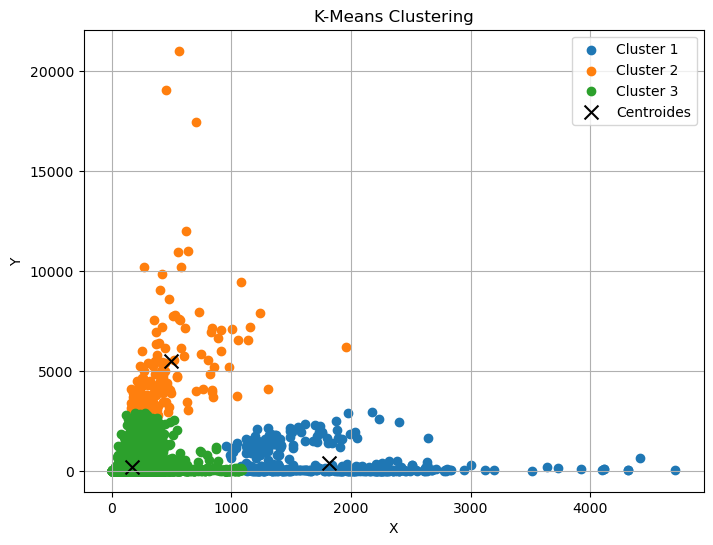

In [19]:
kMeansComplete('Live.csv', ['num_reactions', 'num_comments'], 3)